## EDA

## 1.0 Import packages

In [ ]:
!pip install rdkit
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
# basics
import os
import numpy as np
import pprint as pp
from pathlib import Path
# pandas is used to read/process data
import pandas as pd
#from ydata_profiling import ProfileReport

# machine learning dependencies
# scaling of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# train/test split
from sklearn.model_selection import train_test_split
# model selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# the KRR model
from sklearn.kernel_ridge import KernelRidge
# linear model
from sklearn.linear_model import LinearRegression, SGDRegressor
# pipeline to streamline modeling pipelines
from sklearn.pipeline import Pipeline
# principal component analysis
from sklearn.decomposition import PCA
# polynomial kernel
from sklearn.metrics.pairwise import polynomial_kernel
# Dummy model as baseline
from sklearn.dummy import DummyClassifier, DummyRegressor
# Variance Threshold for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
# metrics to measure model performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error)

# save/load models
import joblib

# For the permutation importance implementation
from joblib import Parallel
from joblib import delayed
from sklearn.metrics import check_scoring
from sklearn.utils import Bunch
from sklearn.utils import check_random_state
from sklearn.utils import check_array

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import rdFingerprintGenerator
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2.0 Import the data

In [ ]:
!pip -q install gdown
import gdown, pandas as pd
gdown.download(id="1jsAHpG05MQTCkUB3qh57u8pStwum_S2E", output="DrugSolubilityData.csv", quiet=False)
df = pd.read_csv("DrugSolubilityData.csv")

Downloading...
From: https://drive.google.com/uc?id=1jsAHpG05MQTCkUB3qh57u8pStwum_S2E
To: /content/DrugSolubilityData.csv
100%|██████████| 3.78M/3.78M [00:00<00:00, 147MB/s]


In [ ]:
df.shape

(27166, 15)

In [ ]:
df.head()

,Label,LogS,"Temperature, K",Predict LogS,Predict uncertainty LogS,Train_Test_Label,Drug,Solvent_1,Solvent_2,SMILES_0,SMILES_1,SMILES_2,comp_0,comp_1,comp_2
0,0,1.0164,278.15,1.0512,0.0672,train,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,O=CN(C)C,OCCC,100,8.3785,91.6215
1,1,1.0601,283.15,1.0894,0.0610,train,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,O=CN(C)C,OCCC,100,8.3785,91.6215
2,2,1.1007,288.15,1.1254,0.0624,train,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,O=CN(C)C,OCCC,100,8.3785,91.6215
3,3,1.1285,293.15,1.1603,0.0656,train,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,O=CN(C)C,OCCC,100,8.3785,91.6215
4,4,1.1586,298.15,1.1923,0.0680,train,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,O=CN(C)C,OCCC,100,8.3785,91.6215


In [ ]:
df.columns

Index(['Label', 'LogS', 'Temperature, K', 'Predict LogS',
       'Predict uncertainty LogS', 'Train_Test_Label', 'Drug', 'Solvent_1',
       'Solvent_2', 'SMILES_0', 'SMILES_1', 'SMILES_2', 'comp_0', 'comp_1',
       'comp_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Label                     27166 non-null  int64  
 1   LogS                      27166 non-null  float64
 2   Temperature, K            27166 non-null  float64
 3   Predict LogS              27166 non-null  float64
 4   Predict uncertainty LogS  27166 non-null  float64
 5   Train_Test_Label          27166 non-null  object 
 6   Drug                      27166 non-null  object 
 7   Solvent_1                 27166 non-null  object 
 8   Solvent_2                 27166 non-null  object 
 9   SMILES_0                  27166 non-null  object 
 10  SMILES_1                  26125 non-null  object 
 11  SMILES_2                  25717 non-null  object 
 12  comp_0                    27166 non-null  int64  
 13  comp_1                    27166 non-null  float64
 14  comp_2

## 3.0 Basic Data Cleaning and Preparation

We perform some data cleaning by removing instances with missing value and removing duplicates.

In [ ]:
df_clean=df.drop(['Predict LogS', 'Predict uncertainty LogS', 'Train_Test_Label'],axis=1).copy()

In [ ]:
df_clean.columns

Index(['Label', 'LogS', 'Temperature, K', 'Drug', 'Solvent_1', 'Solvent_2',
       'SMILES_0', 'SMILES_1', 'SMILES_2', 'comp_0', 'comp_1', 'comp_2'],
      dtype='object')

In [ ]:
print(df_clean.isnull().sum())

Label                0
LogS                 0
Temperature, K       0
Drug                 0
Solvent_1            0
Solvent_2            0
SMILES_0             0
SMILES_1          1041
SMILES_2          1449
comp_0               0
comp_1               0
comp_2               0
dtype: int64


In [ ]:
df_clean.dropna(inplace=True)

In [ ]:
df_clean.isna().sum()

,0
Label,0
LogS,0
"Temperature, K",0
Drug,0
Solvent_1,0
Solvent_2,0
SMILES_0,0
SMILES_1,0
SMILES_2,0
comp_0,0


In [ ]:
# Count the unique values before canonicalization
smiles_cols = df_clean.columns[df_clean.columns.str.match(r'(?i)^smiles_')]
unique_smiles = df_clean[smiles_cols].nunique(dropna=True)
print(unique_smiles)

SMILES_0    125
SMILES_1     36
SMILES_2     25
dtype: int64


In [ ]:
def to_canonical(s,isomeric=True):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if not s:
        return np.nan
    m = Chem.MolFromSmiles(s)
    return Chem.MolToSmiles(m, canonical=True, isomericSmiles=True) if m else np.nan

smiles_cols = ['SMILES_0','SMILES_1','SMILES_2']
df_clean[smiles_cols] = df_clean[smiles_cols].applymap(to_canonical)

/tmp/ipython-input-3745214839.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean[smiles_cols] = df_clean[smiles_cols].applymap(to_canonical)


In [ ]:
smiles_cols = [c for c in df_clean.columns if c.startswith('SMILES_')]
df_clean[smiles_cols] = df_clean[smiles_cols].applymap(
    lambda s: to_canonical(s, isomeric=True)
)
rename_map = {c: f"canonicalized__{c}" for c in smiles_cols}
df_clean.rename(columns=rename_map, inplace=True)

/tmp/ipython-input-3277325726.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean[smiles_cols] = df_clean[smiles_cols].applymap(


In [ ]:
df_clean

,Label,LogS,"Temperature, K",Drug,Solvent_1,Solvent_2,canonicalized__SMILES_0,canonicalized__SMILES_1,canonicalized__SMILES_2,comp_0,comp_1,comp_2
0,0,1.0164,278.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215
1,1,1.0601,283.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215
2,2,1.1007,288.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215
3,3,1.1285,293.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215
4,4,1.1586,298.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215
...,...,...,...,...,...,...,...,...,...,...,...,...
24681,24681,-0.0220,303.15,Vinpocetine,Ethanol,Water,CCOC(=O)C1=CC2(CC)CCCN3CCc4c(n1c1ccccc41)C32,CCO,O,100,90.0000,10.0000
24682,24682,0.0908,308.15,Vinpocetine,Ethanol,Water,CCOC(=O)C1=CC2(CC)CCCN3CCc4c(n1c1ccccc41)C32,CCO,O,100,90.0000,10.0000
24683,24683,0.1755,313.15,Vinpocetine,Ethanol,Water,CCOC(=O)C1=CC2(CC)CCCN3CCc4c(n1c1ccccc41)C32,CCO,O,100,90.0000,10.0000
24684,24684,0.2877,318.15,Vinpocetine,Ethanol,Water,CCOC(=O)C1=CC2(CC)CCCN3CCc4c(n1c1ccccc41)C32,CCO,O,100,90.0000,10.0000


In [ ]:
df_clean.isna().sum()

,0
Label,0
LogS,0
"Temperature, K",0
Drug,0
Solvent_1,0
Solvent_2,0
canonicalized__SMILES_0,0
canonicalized__SMILES_1,0
canonicalized__SMILES_2,0
comp_0,0


In [ ]:
# Count the unique values after canonicalization
smiles_cols = df_clean.columns[df_clean.columns.str.match(r'(?i)^canonicalized')]
canonical_unique = df_clean[smiles_cols].nunique(dropna=True)
print(canonical_unique)

canonicalized__SMILES_0    125
canonicalized__SMILES_1     36
canonicalized__SMILES_2     25
dtype: int64


In [ ]:
df_clean.duplicated().sum()

np.int64(0)

## 4.0 Data Visualization

### 4.1 Distribution of target valiable (Log S)

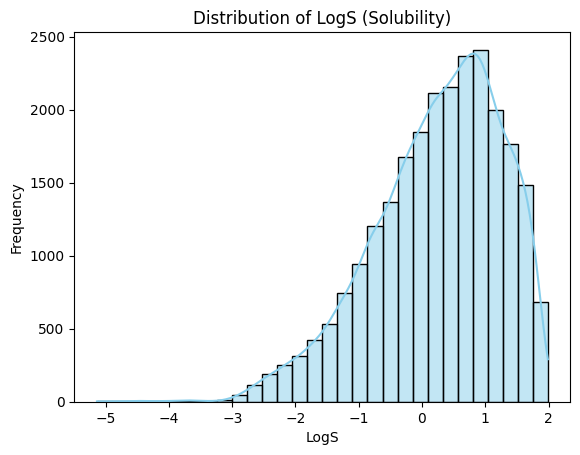

In [ ]:
sns.histplot(df_clean['LogS'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of LogS (Solubility)')
plt.xlabel('LogS')
plt.ylabel('Frequency')
plt.show()

### 4.2 Finding outliers

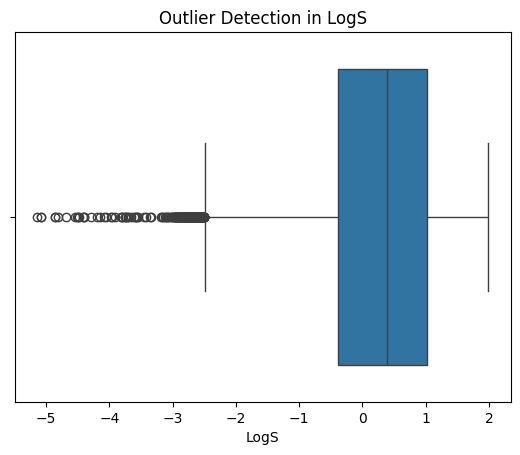

In [ ]:
sns.boxplot(x=df_clean['LogS'])
plt.title('Outlier Detection in LogS')
plt.show()

In [ ]:
Q1 = df_clean['LogS'].quantile(0.25)
Q3 = df_clean['LogS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['LogS'] < lower_bound) | (df_clean['LogS'] > upper_bound)]
print(outliers.shape)
outliers.head()


(234, 12)


,Label,LogS,"Temperature, K",Drug,Solvent_1,Solvent_2,canonicalized__SMILES_0,canonicalized__SMILES_1,canonicalized__SMILES_2,comp_0,comp_1,comp_2
4206,4206,-2.5491,278.15,Diacerein,Dimethylacetamide,Water,CC(=O)Oc1cccc2c1C(=O)c1c(OC(C)=O)cc(C(=O)O)cc1...,CC(=O)N(C)C,O,100,2.2468,97.7532
10312,10312,-2.6405,283.15,Thiabendazole,Methanol,Water,c1ccc2[nH]c(-c3cscn3)nc2c1,CO,O,100,5.8811,94.1189
10313,10313,-2.5421,288.15,Thiabendazole,Methanol,Water,c1ccc2[nH]c(-c3cscn3)nc2c1,CO,O,100,5.8811,94.1189
10402,10402,-2.9163,283.15,Thiabendazole,Acetonitrile,Water,c1ccc2[nH]c(-c3cscn3)nc2c1,CC#N,O,100,4.6509,95.3491
10403,10403,-2.8142,288.15,Thiabendazole,Acetonitrile,Water,c1ccc2[nH]c(-c3cscn3)nc2c1,CC#N,O,100,4.6509,95.3491


### 4.3 Relationship between temperature and solubility

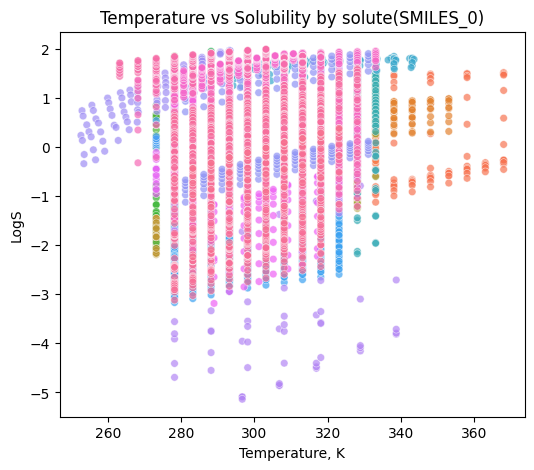

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Temperature, K',
    y='LogS',
    data=df_clean,
    hue='canonicalized__SMILES_0',
    alpha=0.7,
    s=30,
    legend=False
)
plt.title('Temperature vs Solubility by solute(SMILES_0)')
plt.show()


### 4.4 Relationship between solute type and solubility

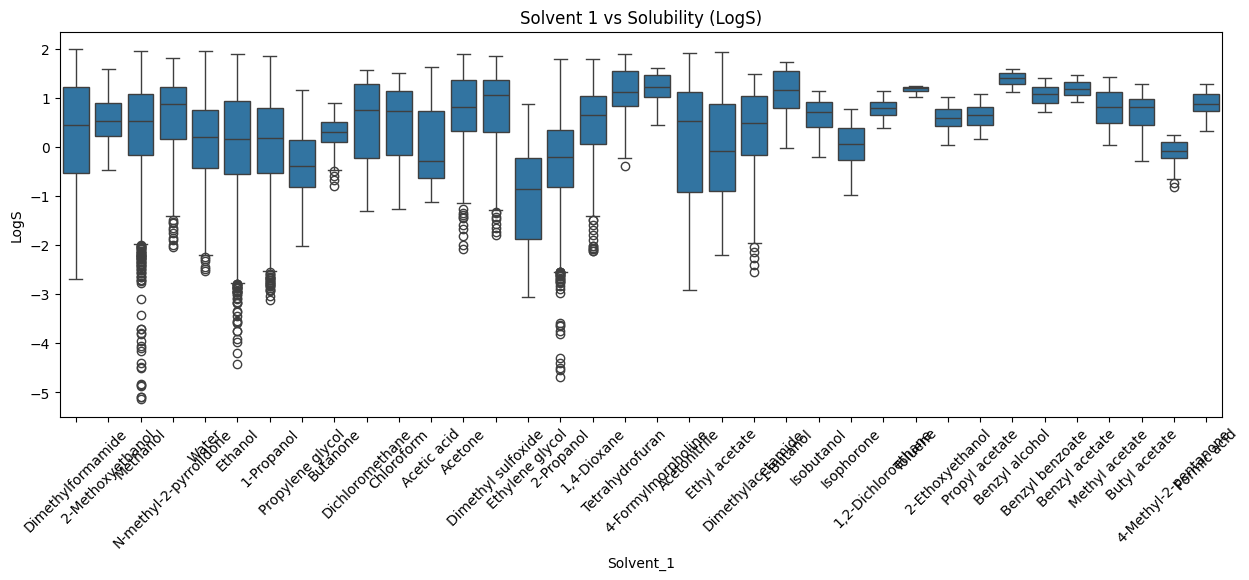

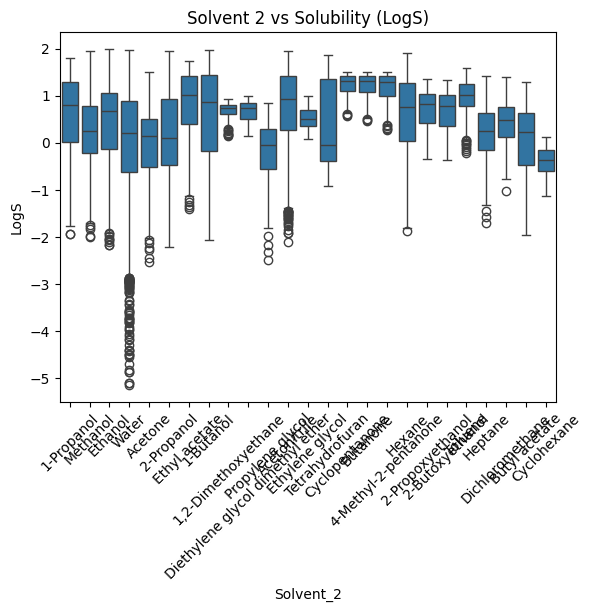

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Solvent_1', y='LogS', data=df_clean)
plt.xticks(rotation=45)
plt.title('Solvent 1 vs Solubility (LogS)')
plt.show()

sns.boxplot(x='Solvent_2', y='LogS', data=df_clean)
plt.title('Solvent 2 vs Solubility (LogS)')
plt.xticks(rotation=45)
plt.show()

### 4.5 Data distribution of the molecular descriptors

In [ ]:
def compute_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'TPSA': Descriptors.TPSA(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'RotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    except:
        return None

In [ ]:
desc_df = df_clean['canonicalized__SMILES_0'].apply(compute_descriptors).apply(pd.Series)
df_with_desc = pd.concat([df_clean, desc_df], axis=1)

In [ ]:
print(df_with_desc[['MolWt', 'LogP', 'TPSA', 'NumHAcceptors', 'NumHDonors']].isnull().sum())
df_with_desc.dropna(subset=['MolWt'], inplace=True)

MolWt            0
LogP             0
TPSA             0
NumHAcceptors    0
NumHDonors       0
dtype: int64


In [ ]:
df_with_desc.head()

,Label,LogS,"Temperature, K",Drug,Solvent_1,Solvent_2,canonicalized__SMILES_0,canonicalized__SMILES_1,canonicalized__SMILES_2,comp_0,comp_1,comp_2,MolWt,LogP,TPSA,NumHAcceptors,NumHDonors,RotatableBonds
0,0,1.0164,278.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215,95.533,-0.73963,75.89,1.0,3.0,0.0
1,1,1.0601,283.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215,95.533,-0.73963,75.89,1.0,3.0,0.0
2,2,1.1007,288.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215,95.533,-0.73963,75.89,1.0,3.0,0.0
3,3,1.1285,293.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215,95.533,-0.73963,75.89,1.0,3.0,0.0
4,4,1.1586,298.15,Guanidine hydrochloride,Dimethylformamide,1-Propanol,Cl.N=C(N)N,CN(C)C=O,CCCO,100,8.3785,91.6215,95.533,-0.73963,75.89,1.0,3.0,0.0


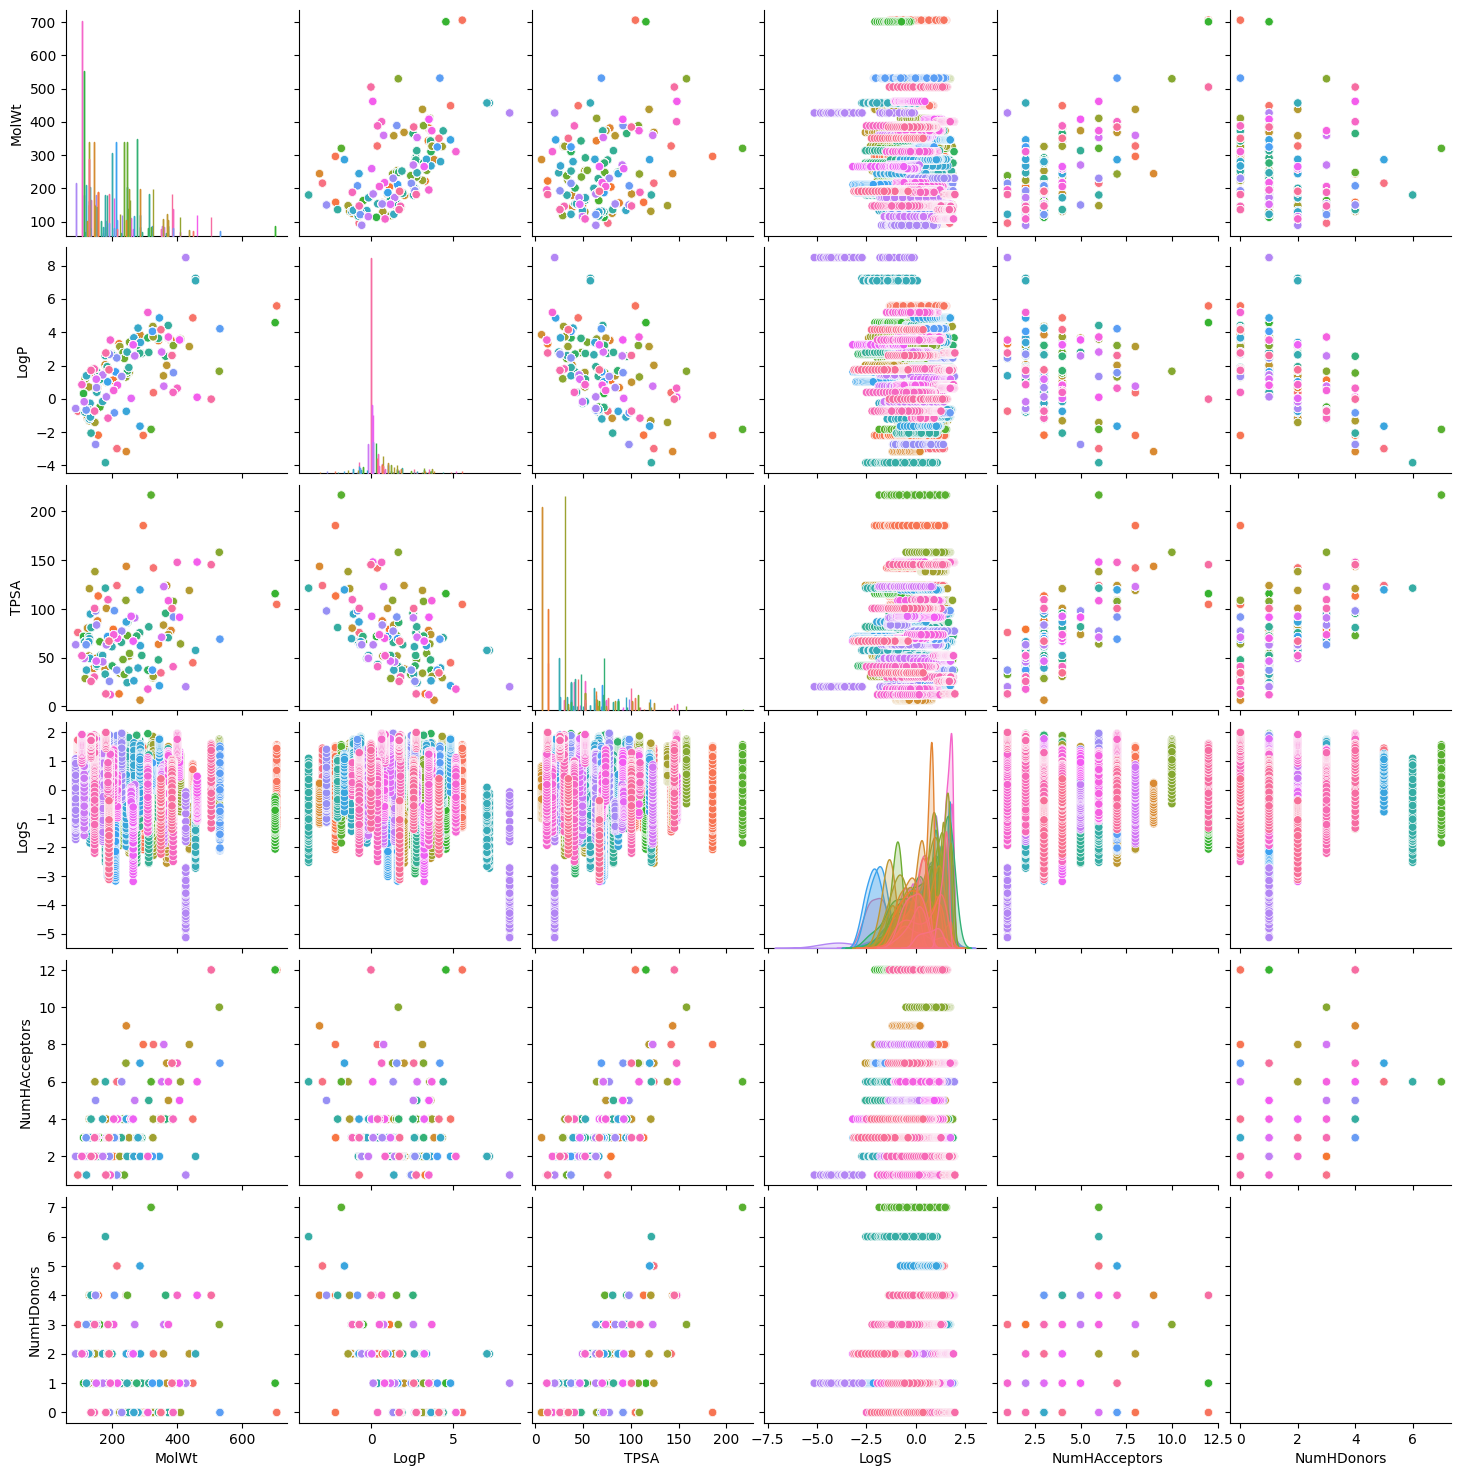

In [ ]:
g = sns.pairplot(
    df_with_desc,
    vars=['MolWt', 'LogP', 'TPSA', 'LogS','NumHAcceptors', 'NumHDonors'],
    hue='canonicalized__SMILES_0'
)

g._legend.remove()

plt.show()

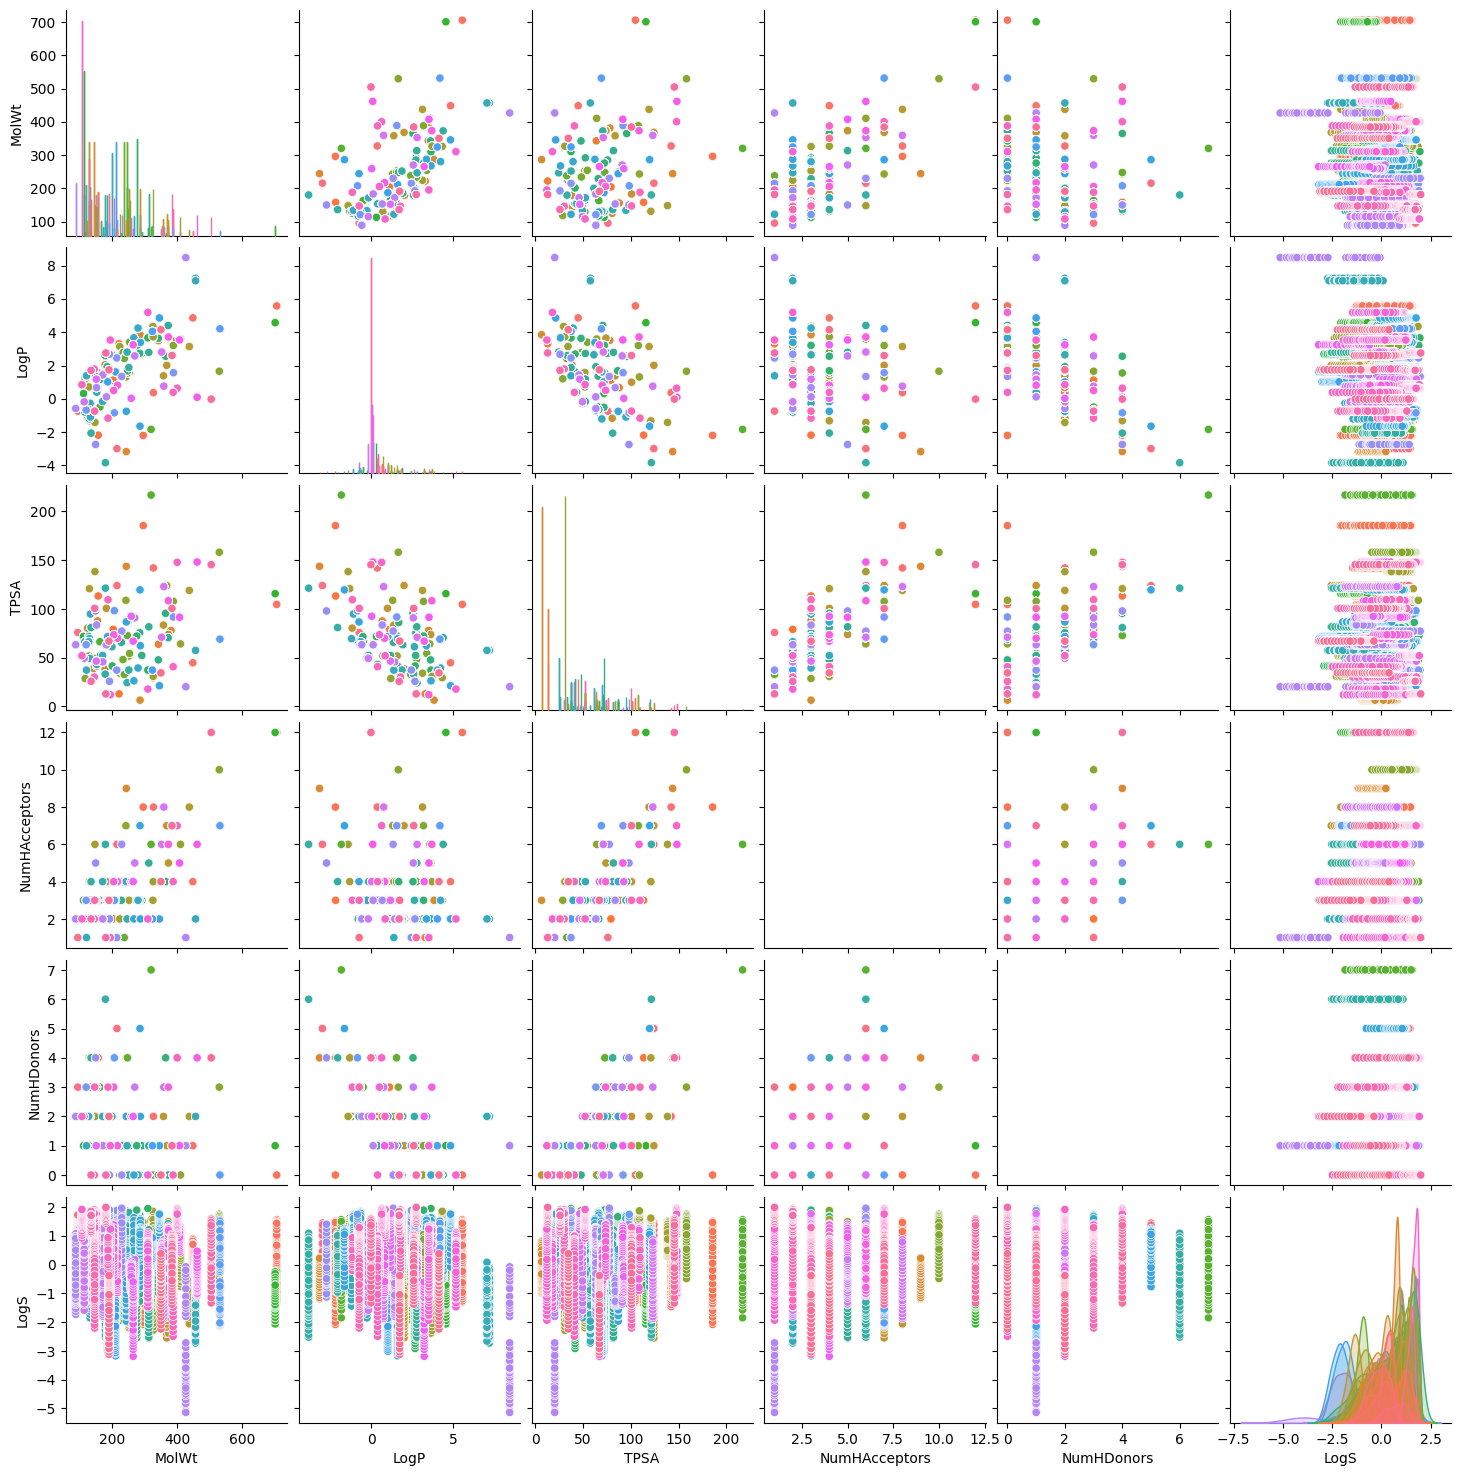

In [ ]:
# Solute Descriptors vs Solubility
numeric_cols = ['MolWt', 'LogP', 'TPSA','NumHAcceptors', 'NumHDonors']
g=sns.pairplot(df_with_desc, vars=numeric_cols + ['LogS'], diag_kind='kde', hue='canonicalized__SMILES_0')
g._legend.remove()
plt.show()

*italicized text*### 4.6 Features distribution

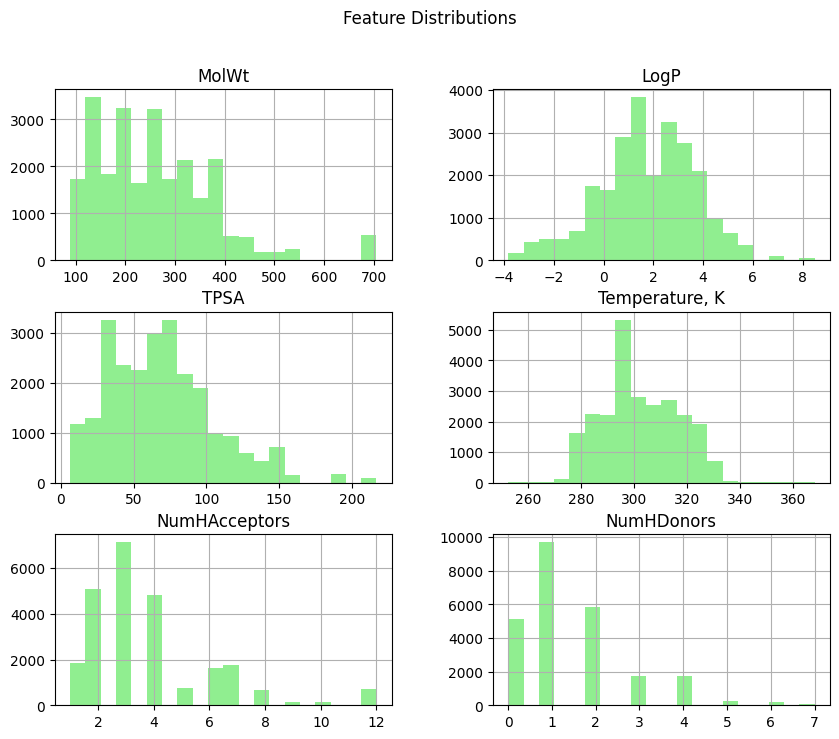

In [ ]:
df_with_desc[['MolWt', 'LogP', 'TPSA', 'Temperature, K','NumHAcceptors', 'NumHDonors']].hist(bins=20, figsize=(10,8), color='lightgreen')
plt.suptitle('Feature Distributions')
plt.show()


### 4.7 Correlation heatmap

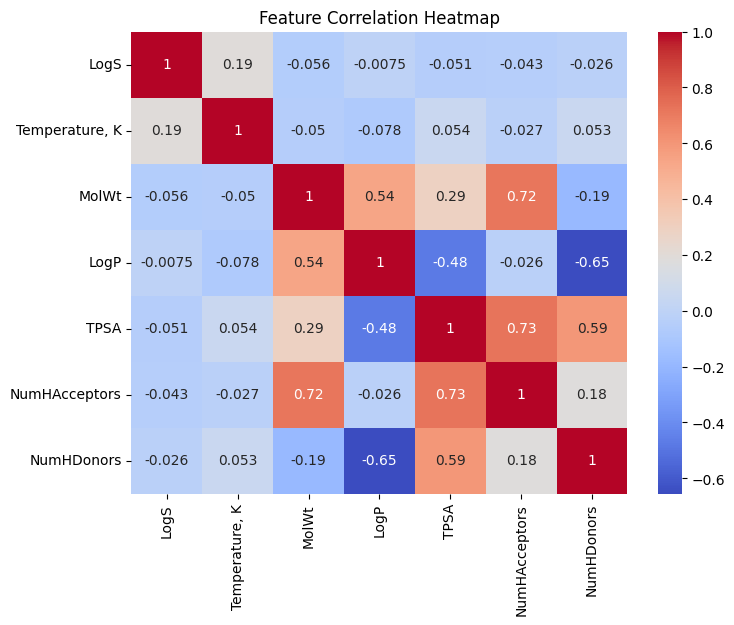

In [ ]:
corr = df_with_desc[['LogS', 'Temperature, K', 'MolWt', 'LogP', 'TPSA', 'NumHAcceptors', 'NumHDonors']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# feature correlation ranking
corr_target = df_with_desc.corr(numeric_only=True)['LogS'].sort_values(ascending=False)
print(corr_target)

LogS              1.000000
comp_1            0.351799
Temperature, K    0.187512
RotatableBonds    0.089360
Label            -0.006586
LogP             -0.007495
NumHDonors       -0.026490
NumHAcceptors    -0.043047
TPSA             -0.050703
MolWt            -0.055572
comp_2           -0.351799
comp_0                 NaN
Name: LogS, dtype: float64


## 5.0 Molecular Fringerprint

In [ ]:
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
def mol_or_none(s):
    return Chem.MolFromSmiles(s) if pd.notna(s) and str(s).strip() else None

mols = df_with_desc['canonicalized__SMILES_0'].map(mol_or_none)
fp_list = [
    morgan_gen.GetFingerprint(m).ToList() if m is not None else [0]*1024
    for m in mols
]
fp_cols = [f'Morgan_bit_{i}' for i in range(1024)]
fingerprint_df = pd.DataFrame(fp_list, columns=fp_cols, index=df_with_desc.index)

print(f"Dataframe of fingerprints shape: {fingerprint_df.shape}")
print(f"First molecule has {sum(fp_list[0])} bits set out of 1024")


Dataframe of fingerprints shape: (24676, 1024)
First molecule has 7 bits set out of 1024


## 6.0 EDA report from ydata_profiling

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_with_desc, title="EDA Report", explorative=True)

In [ ]:
# profile.to_file("eda_report.html")

## 7.0 Data Preparation

In [ ]:
# Set random seed (similar to tutorial)
RANDOM_SEED = 50
np.random.seed(RANDOM_SEED)

# Optional: rename temperature column to avoid comma in the name
df_with_desc = df_with_desc.rename(columns={'Temperature, K': 'Temperature_K'})


### 7.1 Splitting our data into classes and loading features/target

In [ ]:
# Define target and feature names
TARGET = "LogS"

NUMERIC_FEATURES = [
    "Temperature_K",   # renamed from 'Temperature, K'
    "comp_0", "comp_1", "comp_2",
    "MolWt", "LogP", "TPSA",
    "NumHAcceptors", "NumHDonors", "RotatableBonds"
]

CATEGORICAL_FEATURES = ["Drug", "Solvent_1", "Solvent_2"]

ALL_FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES
# Build modeling DataFrame and drop any remaining NaNs
df_model = df_with_desc[[TARGET] + ALL_FEATURES].dropna().copy()

# # Adding fingerprint
# df_with_fps = pd.concat([df_with_desc, fingerprint_df], axis=1)
# FINGERPRINT_FEATURES = fp_cols
# NUMERIC_FEATURES = NUMERIC_FEATURES + FINGERPRINT_FEATURES
# ALL_FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES
# df_model = df_with_fps[[TARGET] + ALL_FEATURES + fp_cols].dropna().copy()

X = df_model[ALL_FEATURES]
y = df_model[TARGET]


### 7.2 Data splitting and Standardization

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.3,
#     random_state=RANDOM_SEED
# )

In [93]:
from sklearn.model_selection import GroupShuffleSplit, GroupKFold

groups = df_model["Drug"]

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)
train_idx, test_idx = next(
    gss.split(df_model[ALL_FEATURES], df_model[TARGET], groups=groups)
)

X_train = df_model.iloc[train_idx][ALL_FEATURES]
X_test  = df_model.iloc[test_idx][ALL_FEATURES]
y_train = df_model.iloc[train_idx][TARGET]
y_test  = df_model.iloc[test_idx][TARGET]

groups_train = df_model.iloc[train_idx]["Drug"]

In [94]:
FEATURES = X_train.columns.tolist()
corr_matrix = X_train[NUMERIC_FEATURES].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

print(f"Original number of features: {len(FEATURES)}")
print(f"Number of features after removing highly correlated features: {X_train.shape[1]}")
print("\nDropped features:")
print(to_drop)

# Update the global FEATURES list
FEATURES = X_train.columns.tolist()
# sync NUMERIC_FEATURES with dropped columns
NUMERIC_FEATURES = [col for col in NUMERIC_FEATURES if col not in to_drop]
ALL_FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES

Original number of features: 12
Number of features after removing highly correlated features: 12

Dropped features:
[]


In [95]:
print(ALL_FEATURES)

['Temperature_K', 'comp_0', 'comp_1', 'MolWt', 'LogP', 'TPSA', 'NumHAcceptors', 'NumHDonors', 'RotatableBonds', 'Drug', 'Solvent_1', 'Solvent_2']


### 7.2 Metrics

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_regression_metrics(model, X, y_true):
    """
    Compute basic regression metrics for a given model:
    RMSE, MAE, and R^2.

    model: sklearn-like model with predict method
    X: feature matrix
    y_true: ground truth continuous target
    """
    y_pred = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"RMSE": rmse, "MAE": mae, "R2": r2}


### 7.3 Dummy baseline

In [97]:
from sklearn.dummy import DummyRegressor

# Baseline: always predict the mean LogS
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)

metrics_dummy = get_regression_metrics(dummy_model, X_test, y_test)

print("Baseline DummyRegressor (predict mean LogS):")
for k, v in metrics_dummy.items():
    print(f"{k}: {v:.3f}")


Baseline DummyRegressor (predict mean LogS):
RMSE: 0.949
MAE: 0.766
R2: -0.000


### 7.4 XGboost + pipeline

In [98]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Remove 'comp_2' from NUMERIC_FEATURES if it was dropped
NUMERIC_FEATURES = [f for f in NUMERIC_FEATURES if f not in to_drop]
ALL_FEATURES = NUMERIC_FEATURES + CATEGORICAL_FEATURES

# Preprocessing: scale numeric features and one-hot encode categorical features
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), NUMERIC_FEATURES),
        ("cat", OneHotEncoder(handle_unknown="ignore"), CATEGORICAL_FEATURES),
    ]
)

xgb_reg = XGBRegressor(
    objective="reg:squarederror",
    random_state=RANDOM_SEED,
    tree_method="hist"
)

# This is the "pipeline" variable that the tutorial asks for
pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("variance_threshold", VarianceThreshold(threshold=0.0)),
    ("model", xgb_reg)
])

### 7.5 Hyperparameter tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    "model__n_estimators": [200, 400, 600, 800],
    "model__max_depth": [3,4, 5, 6, 8],
    "model__learning_rate": [0.03, 0.05, 0.1, 0.15],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],

    "model__reg_lambda": [1, 5, 10],
    "model__reg_alpha": [0, 0.1, 1.0],
}

# xgb_search = RandomizedSearchCV(
#     pipeline,
#     param_distributions=param_distributions,
#     n_iter=30,
#     scoring="neg_root_mean_squared_error",
#     cv=5,
#     random_state=RANDOM_SEED,
#     n_jobs=-1,
#     verbose=1
# )

# xgb_search.fit(X_train, y_train)

group_kfold = GroupKFold(n_splits=5)

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=group_kfold,
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=1
)

search.fit(X_train, y_train, groups=groups_train)

print("Best CV RMSE:", -search.best_score_)
print("Best parameters:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best CV RMSE: 0.9928571408654239
Best parameters:
  model__subsample: 0.6
  model__reg_lambda: 1
  model__reg_alpha: 1.0
  model__n_estimators: 600
  model__max_depth: 6
  model__learning_rate: 0.1
  model__colsample_bytree: 0.6


### 7.6 Test

In [ ]:
best_xgb_pipeline = search.best_estimator_

metrics_xgb = get_regression_metrics(best_xgb_pipeline, X_test, y_test)

print("\nXGBoost Regression (best pipeline on test set):")
for k, v in metrics_xgb.items():
    print(f"{k}: {v:.3f}")



XGBoost Regression (best pipeline on test set):
RMSE: 0.928
MAE: 0.710
R2: 0.139


### 7.7 graphs

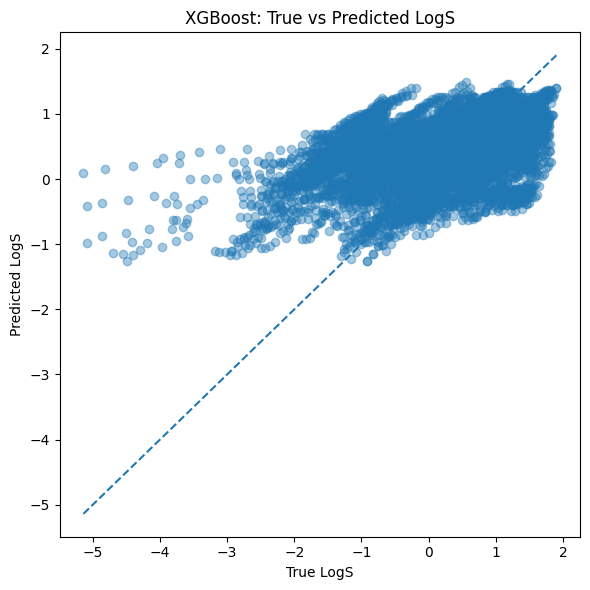

In [ ]:
# 1) True vs Predicted plot
y_test_pred = best_xgb_pipeline.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "--")
plt.xlabel("True LogS")
plt.ylabel("Predicted LogS")
plt.title("XGBoost: True vs Predicted LogS")
plt.tight_layout()
plt.show()



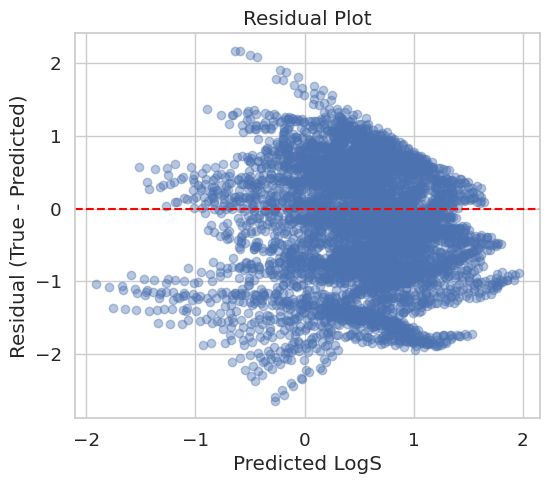

In [101]:
y_pred = best_xgb_pipeline.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted LogS")
plt.ylabel("Residual (True - Predicted)")
plt.title("Residual Plot")
plt.show()

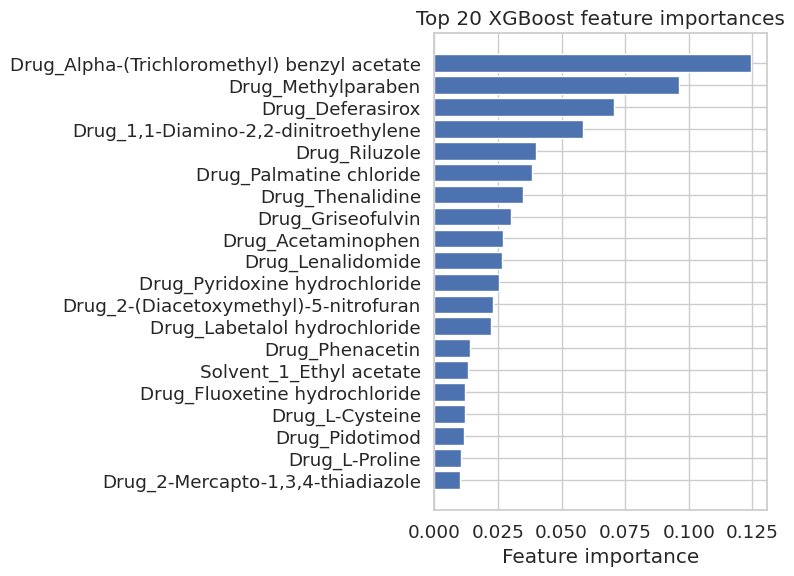

In [102]:
# 2) Total Feature importance (Top 20)
ohe = best_xgb_pipeline.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(CATEGORICAL_FEATURES)
all_feature_names = np.concatenate([NUMERIC_FEATURES, cat_feature_names])

xgb_internal = best_xgb_pipeline.named_steps["model"]
importances = xgb_internal.feature_importances_

idx = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(8, 6))
plt.barh(np.array(all_feature_names)[idx][::-1],
         importances[idx][::-1])
plt.xlabel("Feature importance")
plt.title("Top 20 XGBoost feature importances")
plt.tight_layout()
plt.show()

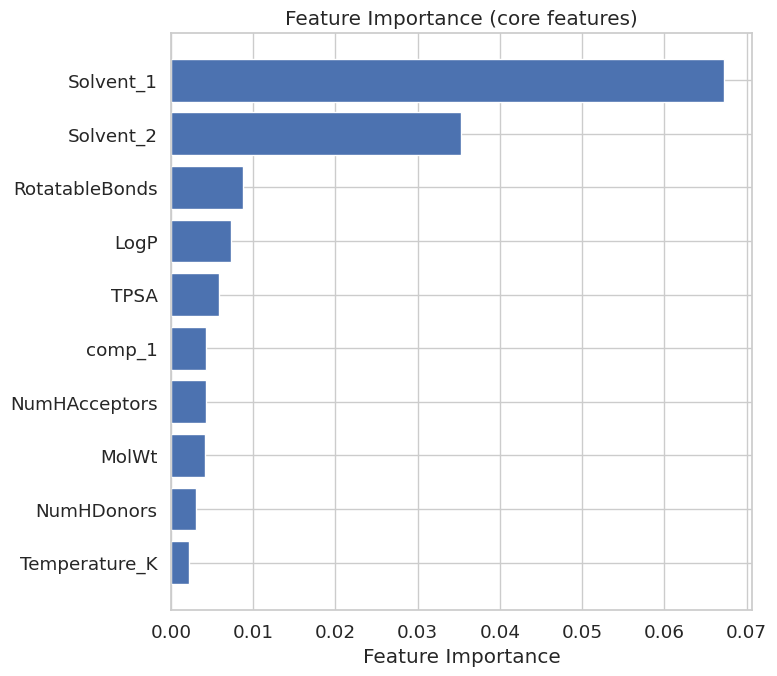

In [103]:
def get_importance_for_core_features(best_xgb_pipeline):
    # 1. Feature names after preprocessing (num__ and cat__)
    processed_names = best_xgb_pipeline.named_steps["preprocess"].get_feature_names_out()

    # 2. VarianceThreshold mask
    vt_mask = best_xgb_pipeline.named_steps["variance_threshold"].get_support()
    final_feature_names = processed_names[vt_mask]

    # 3. Importances from XGBoost
    importances = best_xgb_pipeline.named_steps["model"].feature_importances_

    # 4. Build DataFrame with mapping
    df = pd.DataFrame({
        "feature_processed": final_feature_names,
        "importance": importances
    })

    # 5. Clean names: remove num__ / cat__
    df["feature_clean"] = (
        df["feature_processed"]
        .str.replace("num__", "", regex=False)
        .str.replace("cat__", "", regex=False)
    )

    # 5) Define a "feature_rv" feature name
    df["feature_rv"] = df["feature_clean"]
    df.loc[df["feature_clean"].str.startswith("Solvent_1_"), "feature_rv"] = "Solvent_1"
    df.loc[df["feature_clean"].str.startswith("Solvent_2_"), "feature_rv"] = "Solvent_2"

    # 6) Aggregate importances by revised feature
    feature_rv_imp = df.groupby("feature_rv", as_index=False)["importance"].sum()

    # 7) Keep only the 10 core features
    core_features = [
        "Temperature_K",
        "comp_1",
        "MolWt",
        "LogP",
        "TPSA",
        "NumHAcceptors",
        "NumHDonors",
        "RotatableBonds",
        "Solvent_1",
        "Solvent_2",
    ]

    fi_core = feature_rv_imp[feature_rv_imp["feature_rv"].isin(core_features)]
    fi_core = fi_core.sort_values("importance", ascending=True)

    return fi_core

fi_core = get_importance_for_core_features(best_xgb_pipeline)

plt.figure(figsize=(8, 7))
sns.set(style="whitegrid", font_scale=1.2)
plt.barh(fi_core["feature_rv"], fi_core["importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance (core features)")
plt.tight_layout()
plt.show()

In [104]:
print(len(ALL_FEATURES))

12


In [105]:
print(ALL_FEATURES)

['Temperature_K', 'comp_0', 'comp_1', 'MolWt', 'LogP', 'TPSA', 'NumHAcceptors', 'NumHDonors', 'RotatableBonds', 'Drug', 'Solvent_1', 'Solvent_2']


/tmp/ipython-input-1043507815.py:24: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


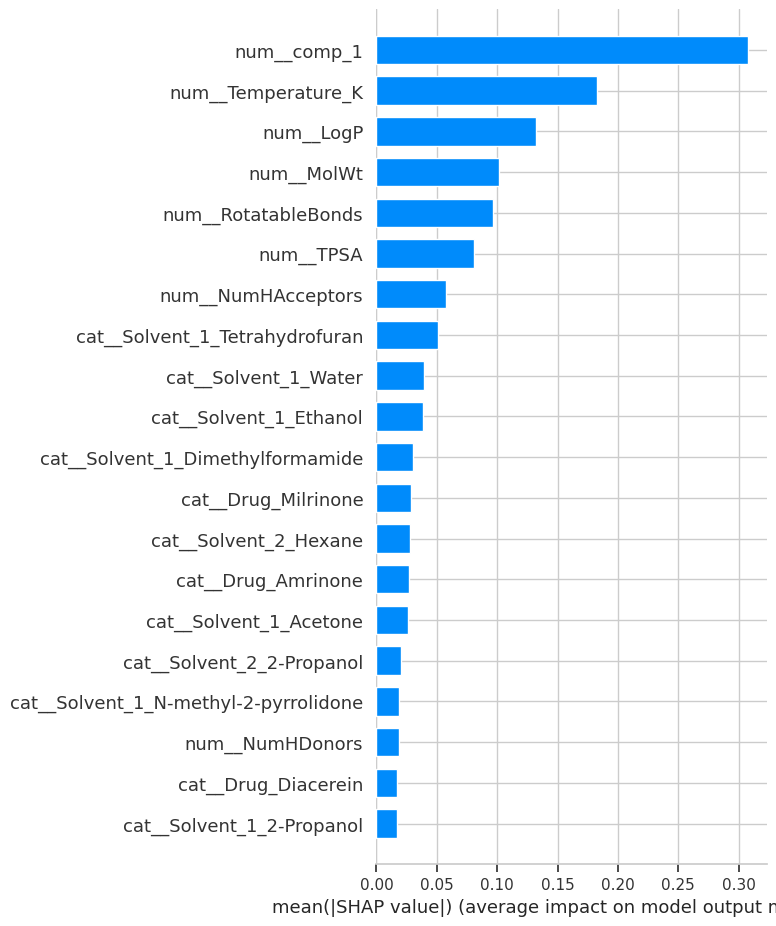

In [114]:
import shap
shap.initjs()

# 1. Set the model from XGBoost
xgb_model = best_xgb_pipeline.named_steps["model"]

# 2. Preprocess X_test in the pipeline
X_test_proc = best_xgb_pipeline.named_steps["preprocess"].transform(X_test)

# 3. Apply VarianceThreshold
VT = best_xgb_pipeline.named_steps["variance_threshold"]
X_test_proc = VT.transform(X_test_proc)

# 4. Get final feature names
processed_names = best_xgb_pipeline.named_steps["preprocess"].get_feature_names_out()
final_feature_names = processed_names[VT.get_support()]

idx = np.random.choice(X_test_proc.shape[0], size=min(300, X_test_proc.shape[0]), replace=False)
X_shap = X_test_proc[idx]

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_shap)

shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=final_feature_names,
    plot_type="bar"
)

/tmp/ipython-input-2686305694.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


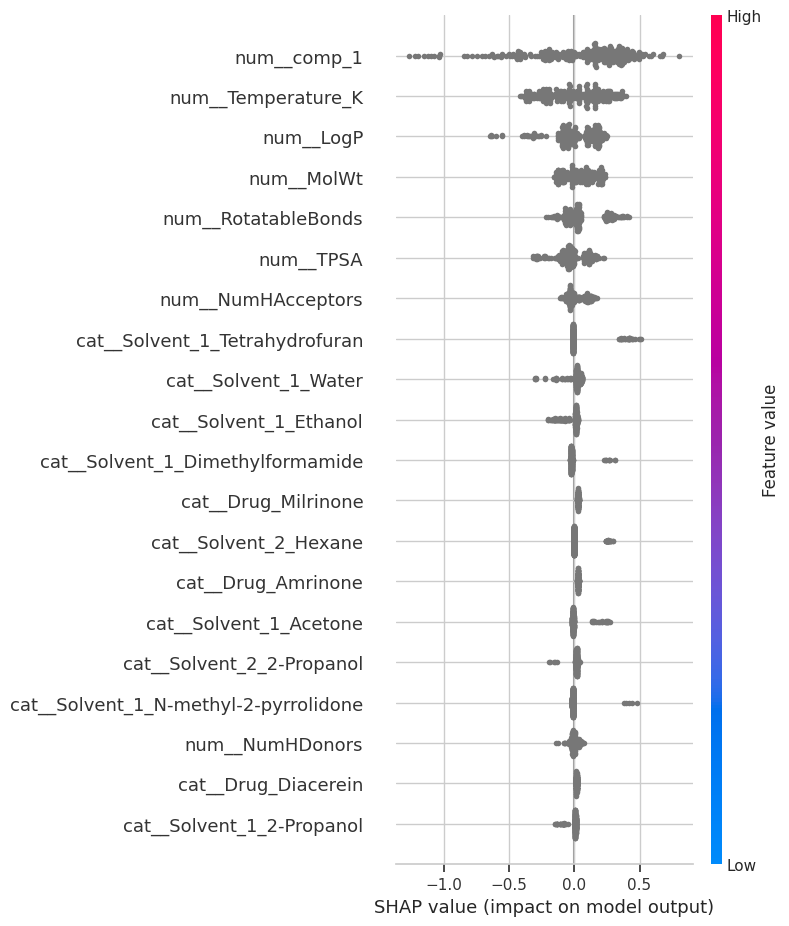

In [115]:
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=final_feature_names
)

In [110]:
processed_names = best_xgb_pipeline.named_steps["preprocess"].get_feature_names_out()
VT = best_xgb_pipeline.named_steps["variance_threshold"]
final_feature_names = processed_names[VT.get_support()]


Features for this sample:


,23886
Temperature_K,313.15
comp_0,100
comp_1,70.0
MolWt,504.636
LogP,-0.0176
TPSA,145.44
NumHAcceptors,12.0
NumHDonors,4.0
RotatableBonds,12.0
Drug,Dipyridamole


True LogS: 1.2231
Predicted LogS: 0.32233435


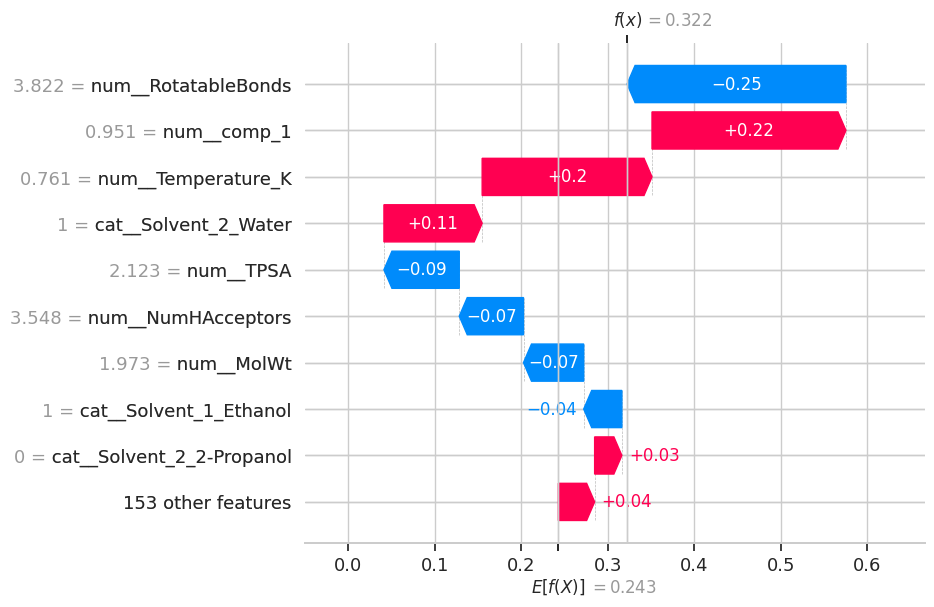

In [111]:
import shap
shap.initjs()

idx    = np.random.choice(X_test_proc.shape[0],
                          size=min(300, X_test_proc.shape[0]),
                          replace=False)
X_shap = X_test_proc[idx]

i       = 0
sample  = X_shap[i:i+1]

original_i   = idx[i]
original_idx = X_test.index[original_i]

print("Features for this sample:")
display(X_test.loc[original_idx])

print("True LogS:",      y_test.loc[original_idx])
print("Predicted LogS:", best_xgb_pipeline.predict(X_test.iloc[[original_i]])[0])

xgb_model   = best_xgb_pipeline.named_steps["model"]
explainer   = shap.TreeExplainer(xgb_model)
shap_values = explainer(sample)


shap_exp = shap.Explanation(
    values        = shap_values.values,
    base_values   = shap_values.base_values,
    data          = shap_values.data,
    feature_names = final_feature_names
)

shap.plots.waterfall(shap_exp[0])
